### Comparison of Prices through Web scraping

In [1]:
import bs4, requests
import re
import pandas as pd
import numpy as np
import json

from re import sub
from decimal import Decimal
import matplotlib.pyplot as plt


In [2]:
url='https://www.cargurus.com/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?zip=02150&showNegotiable=true&sortDir=ASC&sourceContext=carGurusHomePageModel&distance=50&sortType=DEAL_SCORE&entitySelectingHelper.selectedEntity=d930'
res = requests.get(url)


In [3]:
soup = bs4.BeautifulSoup(res.text)
#print(soup.prettify())

In [4]:
#find data in dictionary format
dataset = soup.find_all("script")
dictionary = []
for data in dataset:
    #print(type(data))
    #print(data)
    if 'PREFLIGHT' in str(data):
        dictionary.append(data)
        #print('found')
        break
             
data_str = str(dictionary)
dict_object = json.loads(re.search('({.+})', data_str).group(0).replace("'", '"'))
print(type(dict_object))
#print(dict_object)

<class 'dict'>


In [5]:
#for key, value in dict_object.items():
    #print(key)

listings = dict_object["listings"]
#print(type(listings))
#print(listings)
output_frame = pd.DataFrame(columns = ['Title','Price','Mileage', 'Year'])
for car in listings:
    year = car['carYear']
    title = car['listingTitle']
    price = car['price']
    mileage = car['mileage']
    output_frame.loc[len(output_frame.index)] = [title, price, mileage, year]
    
output_frame

,Title,Price,Mileage,Year
0,2019 Audi Q7 quattro Progressiv 45 TFSI AWD,34050.0,32160,2019
1,2018 Audi Q7 3.0 TFSI quattro Premium Plus AWD,25995.0,70362,2018
2,2019 Audi Q7 2.0T quattro Premium Plus AWD,41000.0,9957,2019
3,2019 Audi Q7 2.0T quattro Premium Plus AWD,36545.0,35338,2019
4,2019 Audi Q7 3.0T quattro Prestige AWD,44900.0,20464,2019
5,2015 Audi Q7 3.0T quattro Premium Plus AWD,17500.0,79761,2015
6,2019 Audi Q7 3.0T quattro Premium Plus AWD,38995.0,34021,2019
7,2020 Audi Q7 quattro Premium 45 TFSI AWD,42491.0,30754,2020
8,2015 Audi Q7 3.0T quattro Premium Plus AWD,16990.0,91012,2015
9,2018 Audi Q7 2.0 TFSI quattro Premium Plus AWD,32143.0,44143,2018


In [6]:
Average_price_point_Boston= output_frame['Price'].mean()
Average_price_point_Boston

32382.266666666666

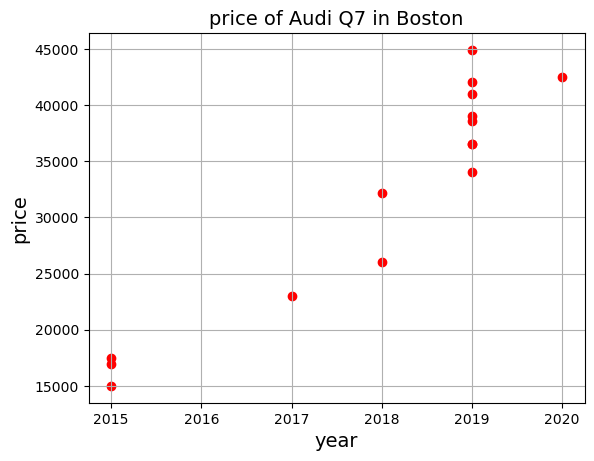

In [7]:
plt.scatter(output_frame['Year'], output_frame['Price'], color='red', marker='o')
plt.title('price of Audi Q7 in Boston', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()

In [8]:
output_frame['Year'] = pd.to_numeric(output_frame['Year'])
output_frame['Price'] = pd.to_numeric(output_frame['Price'])
output_frame['Price'].corr(output_frame['Year'])
output_frame.corr()

,Price,Mileage,Year
Price,1.000000,-0.956302,0.943868
Mileage,-0.956302,1.000000,-0.888327
Year,0.943868,-0.888327,1.000000


In [9]:
url2='https://www.cargurus.com/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?zip=43212&showNegotiable=true&sortDir=ASC&sourceContext=carGurusHomePageModel&distance=50&sortType=DEAL_SCORE&entitySelectingHelper.selectedEntity=d930'
res = requests.get(url2)

In [10]:
soup = bs4.BeautifulSoup(res.text)
#print(soup.prettify())

In [11]:
#find data in dictionary format
dataset = soup.find_all("script")
dictionary = []
for data in dataset:
    #print(type(data))
    #print(data)
    if 'PREFLIGHT' in str(data):
        dictionary.append(data)
        #print('found')
        break
             
data_str = str(dictionary)
dict_object = json.loads(re.search('({.+})', data_str).group(0).replace("'", '"'))
print(type(dict_object))
#print(dict_object)

<class 'dict'>


In [12]:
#for key, value in dict_object.items():
    #print(key)

listings = dict_object["listings"]
#print(type(listings))
#print(listings)
output_frame = pd.DataFrame(columns = ['Title','Price','Mileage', 'Year'])
for car in listings:
    year = car['carYear']
    title = car['listingTitle']
    price = car['price']
    mileage = car['mileage']
    output_frame.loc[len(output_frame.index)] = [title, price, mileage, year]
    
output_frame

,Title,Price,Mileage,Year
0,2017 Audi Q7 3.0T quattro Prestige AWD,28799.0,61768,2017
1,2017 Audi Q7 2.0T quattro Premium Plus AWD,24380.0,73144,2017
2,2021 Audi Q7 quattro Premium Plus 55 TFSI AWD,47153.0,51478,2021
3,2019 Audi Q7 3.0T quattro SE Premium Plus AWD,34980.0,44336,2019
4,2018 Audi Q7 3.0 TFSI quattro Prestige AWD,28000.0,82675,2018
5,2017 Audi Q7 3.0T quattro Premium Plus AWD,23618.0,94240,2017
6,2020 Audi Q7 quattro Premium 55 TFSI AWD,45394.5,30344,2020
7,2013 Audi Q7 3.0T quattro S-Line Prestige AWD,13977.0,119478,2013
8,2018 Audi Q7 3.0 TFSI quattro Prestige AWD,26587.0,88182,2018
9,2017 Audi Q7 3.0T quattro Prestige AWD,25699.0,89123,2017


In [13]:
Average_price_point_Columbus=output_frame['Price'].mean()
Average_price_point_Columbus

28401.239999999998

In [14]:
output_frame['Year'] = pd.to_numeric(output_frame['Year'])
output_frame['Price'] = pd.to_numeric(output_frame['Price'])
output_frame['Price'].corr(output_frame['Year'])
output_frame.corr()

,Price,Mileage,Year
Price,1.000000,-0.902003,0.912674
Mileage,-0.902003,1.000000,-0.805963
Year,0.912674,-0.805963,1.000000


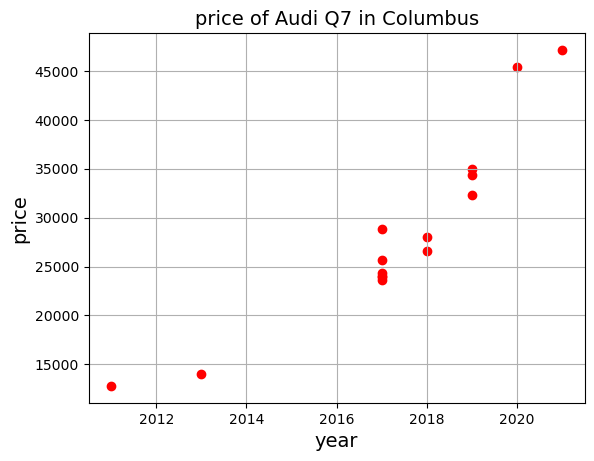

In [15]:
plt.scatter(output_frame['Year'], output_frame['Price'], color='red', marker='o')
plt.title('price of Audi Q7 in Columbus', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()